In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/teeru/Downloads/ml-100k/u.data", header = None, sep ='\t', names = ['userid', 'itemid','rating','timestamp'])

In [3]:
df.head()

,userid,itemid,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
user = pd.read_csv("C:/Users/teeru/Downloads/ml-100k/u.user", header = None, sep ='|', names = ['userid', 'age','gender','occupation','zipcode'])

In [5]:
user.head()

,userid,age,gender,occupation,zipcode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [6]:
user.describe()

,userid,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


Text(0.5,1,'Histogram of age of users')

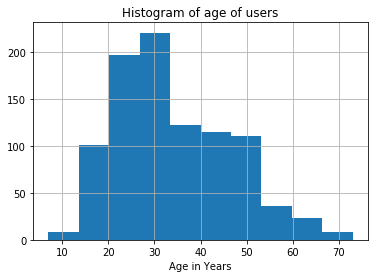

In [35]:
import matplotlib.pyplot as plt
user['age'].hist()

plt.xlabel("Age in Years")
plt.title("Histogram of age of users")

Assuming an account cannot be created if the age is below 18, I consider them as outliers and remove them

In [9]:
len(user[user['age']<18])

36

In [10]:
len(user['age'][user['age']>18])

889

In [11]:
new_user = user[user['age']>18]

In [13]:
merged_data = df.merge(new_user, left_on = 'userid', right_on = 'userid')

In [14]:
merged_data.head()

,userid,itemid,rating,timestamp,age,gender,occupation,zipcode
0,196,242,3,881250949,49,M,writer,55105
1,196,393,4,881251863,49,M,writer,55105
2,196,381,4,881251728,49,M,writer,55105
3,196,251,3,881251274,49,M,writer,55105
4,196,655,5,881251793,49,M,writer,55105


In [15]:
merged_data['age_decile'] = pd.qcut(merged_data['age'],10)

In [16]:
merged_data.head()

,userid,itemid,rating,timestamp,age,gender,occupation,zipcode,age_decile
0,196,242,3,881250949,49,M,writer,55105,"(44.0, 50.0]"
1,196,393,4,881251863,49,M,writer,55105,"(44.0, 50.0]"
2,196,381,4,881251728,49,M,writer,55105,"(44.0, 50.0]"
3,196,251,3,881251274,49,M,writer,55105,"(44.0, 50.0]"
4,196,655,5,881251793,49,M,writer,55105,"(44.0, 50.0]"


In [17]:
user['zipcode'].nunique()

795

In [18]:
mcol = ['movie id','movie title','release date','video release date','IMDb URL','unknown','Action','Adventure','Animation',"Children's",'Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']

In [19]:
movie = pd.read_csv("C:/Users/teeru/Downloads/ml-100k/u.item", sep = '|', header = None, encoding='latin-1', names = mcol)

Text(0.5,1,'Histogram of ratings given by users for all movies')

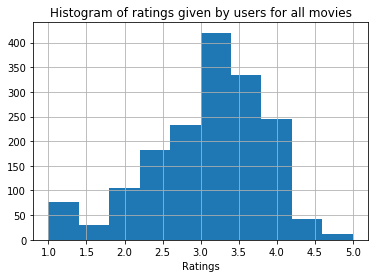

In [21]:
#Distribution of avg ratings
df.groupby('itemid')['rating'].mean().hist()
plt.xlabel("Ratings")
plt.title("Histogram of ratings given by users for all movies")

In [22]:
movie_new = movie[['movie id', 'movie title']]

Text(0.5,1,'Histogram of ratings for all users and movies')

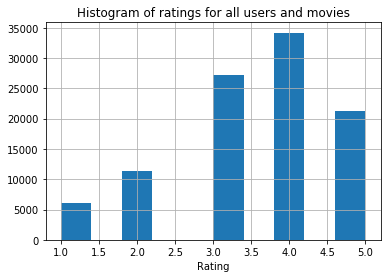

In [33]:
# histogram of ratings
df['rating'].hist()
plt.xlabel("Rating")
plt.title("Histogram of ratings for all users and movies")

In [23]:
final_data = movie_new.merge(merged_data, left_on = 'movie id',right_on = 'itemid')

In [24]:
tot = len(final_data)
five = len(final_data[final_data['rating'] == 5.0])

In [25]:
five/tot

0.20970720957078393

In [26]:
def nps(scores):
    validscores = [v for v in scores if v>=0 and v <=5]
    
    promoters = [s for s in validscores if s >=4 and s <=5]
    
    detractors = [s for s in validscores if s >=0 and s <=2]
    
    npscore = float(len(promoters) - len(detractors)) / len (validscores)
    return npscore

In [27]:
def nps(scores):
    validscores = [v for v in scores if v>=0 and v <=5]
    
    promoters = [s for s in validscores if s <=5]
    
    detractors = [s for s in validscores if s >=0 and s <=2]
    
    npscore = float(len(promoters) - len(detractors)) / len (validscores)
    return npscore

In [29]:
avg_rating = final_data.groupby(['gender','age_decile','occupation','movie title'])['rating'].agg(nps)

In [129]:
avg_rating.to_csv("C:/Users/teeru/Downloads/ml-100k/dumb_model_new.csv")